<a href="https://colab.research.google.com/github/premswaroopmusti/BERT/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow_hub import KerasLayer


In [15]:
encoder_url  = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

### **Pre-processing stage**

In [16]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)


In [17]:
text_test = ['nice movie indeed','i love hearing music']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [18]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

here the shape is 2,128

2 bcz we have two sentences, and 128 is bcz it is the maximum size of the vector

remaining words are 0 in vector bcz u have only 5 words to input

now first sentence has 3 words 'nice movie indeed'

whereas in the output the  mask is for 5 words

Lets understand why

the way BERT works is it always puts a speical token called CLS in the beginning.

and to seperate two sentences it will use special token called SEP.

CLS nice movie indeed SEP

so now if we count total words they are 5



In [19]:
text_preprocessed['input_word_ids']

# CLS nice movie indeed SEP
# so respective to sentence 1, the word id for CLS is 101, for SEP is 102 and 3835,3185,5262 are the individual unique id's for the words nice movie indeed
# these could be the id's from vocabulary
# so this is part of the pre-processing stage


<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[ 101, 3835, 3185, 5262,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 1045, 2293, 4994, 2189,  102,    0,    0,    0,    0,    0,
           0,

### **Word Embeddings stage**



In [20]:
bert_model = hub.KerasLayer(encoder_url)

In [21]:
# let's supply our preprocessed text to our bert_model and model will generate word embeddings in the output
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['pooled_output', 'sequence_output', 'default', 'encoder_outputs'])

In [22]:
# pooled ouput is an embedding for the entire sentence
bert_results['pooled_output']

# we have got two arrays in the output for our 2 sentences 
# 1st array is the word embedding for the sentence 'nice movie indeed' 
# size of each embedding vector is 768
# so this 768 sized vector accurately represents the statement nice movie indeed

# 2nd array is the word embedding for the sentence 'i love hearing music' 
# size of each embedding vector is 768


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.79177415, -0.21411929,  0.497695  , ...,  0.24465187,
        -0.47334486,  0.817587  ],
       [-0.9320657 , -0.404375  , -0.45862344, ..., -0.24606998,
        -0.7063139 ,  0.9461551 ]], dtype=float32)>

In [23]:
# sequence output is individual word embedding vectors
bert_results['sequence_output']
# so the shape of each array is 2,128,768
# 2 bcz we have two sentences

# ok u will have some padding and u will have total 128
# nice movie indeed 0 0 0 0 0  <--128
# for each word there is a 768 sized vector 
# lets say we have word nice in output we have a vector like [ 0.07292047,  0.0856783 ,  0.14476836, ..., -0.09677088, 0.08722125,  0.07711098] in starting
# and for word word movie in output we have a vector like [ 0.17839392, -0.19006087,  0.5034945 , ..., -0.05869797,0.32717094, -0.15578584]
# in the same way there are total 128 vectors for a sentence
# nice movie indeed 0 0 0 0 0  <--128
# now we will get a doubt that we have only 3 words then how 128 vectors
# so we will do padding    nice movie indeed 0 0 0 0 0  <--128
# thats why 128 vectors
# now u can ask that u said padding then remaining vectors should contain values as 0, but we can see some numerical values in other vectors too bcz this is a contextualized
# padding, so the vector for even padding will have some content of that sentence

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292049,  0.08567837,  0.14476836, ..., -0.09677101,
          0.08722137,  0.07711073],
        [ 0.17839389, -0.19006103,  0.5034947 , ..., -0.0586982 ,
          0.32717156, -0.1557859 ],
        [ 0.1870147 , -0.43388787, -0.48875108, ..., -0.15502746,
          0.00145106, -0.24470964],
        ...,
        [ 0.12083076,  0.12884216,  0.46453512, ...,  0.0737555 ,
          0.17441984,  0.16522063],
        [ 0.07967868, -0.01190686,  0.5022539 , ...,  0.13777745,
          0.21002242,  0.00624573],
        [-0.07212704, -0.28303486,  0.59033346, ...,  0.4755195 ,
          0.16668499, -0.08920333]],

       [[ 0.15144816,  0.42059615, -0.11882626, ..., -0.24039592,
          0.14330676,  0.09407903],
        [ 0.5137974 ,  0.43028075, -0.36718598, ..., -0.4015102 ,
          0.29820722, -0.12878697],
        [ 1.3179296 ,  1.0378271 ,  0.4808857 , ...,  0.21842688,
          0.2276538 , -0.22388609],
        ...,

In [24]:
len(bert_results['encoder_outputs'])

12

the reason this is 12 bcz we are using 
BERT base
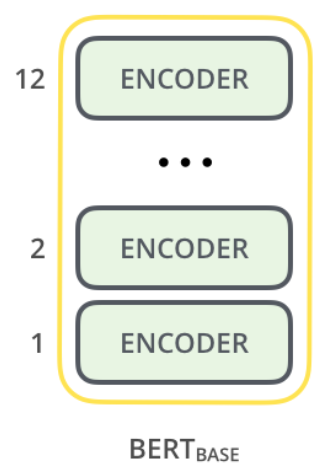

In [25]:
bert_results['encoder_outputs'][0]
# nice movie indeed 0 0 0 0 0   <---- 128
# shape of array is 2,128,768
# 2 bcz we have two sentences
# 128 bcz the sentence has 128 words including the padding
# and for each word there is 768 sized embedding vector

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 1.29014328e-01,  6.44741952e-03, -3.61497253e-02, ...,
          4.99962717e-02,  6.14920072e-02, -2.65752822e-02],
        [ 1.17533827e+00,  1.21407855e+00,  1.15699828e+00, ...,
          1.16343506e-01, -3.58553648e-01, -4.04901654e-01],
        [ 3.85903642e-02,  5.38699806e-01, -2.10897863e-01, ...,
          2.18582243e-01,  7.26016819e-01, -1.11586034e+00],
        ...,
        [-7.58702010e-02, -2.54219085e-01,  7.07551181e-01, ...,
          5.05420029e-01, -1.88786805e-01,  1.50283366e-01],
        [-1.60665989e-01, -2.80896872e-01,  5.75970709e-01, ...,
          5.27585447e-01, -1.11413911e-01,  2.88756024e-02],
        [-4.42816243e-02, -2.02795759e-01,  5.90935528e-01, ...,
          8.13383520e-01, -3.90758157e-01, -2.60172784e-02]],

       [[ 1.91148892e-01,  7.68799931e-02, -9.14292261e-02, ...,
          5.41955233e-03,  1.47287890e-01,  6.03862517e-02],
        [ 7.97423899e-01,  1.03932905e+00, -2.06